In [139]:
import os
import numpy as np
import matplotlib.pyplot as plt


# read all files in "measurements" folder
files = os.listdir("measurements")
print(*enumerate(files))

(0, 'pc2pc') (1, 'pc2phone') (2, 'pc2phone3g') (3, 'pc2rpi') (4, 'pcvpn2phone') (5, 'phone2pc') (6, 'phone2pcvpn') (7, 'phone3g2pc') (8, 'rpi2pc')


In [146]:
print([file.replace("2", " -> ") for file in files], "\n")
labels = ['PC ➔ PC', 'PC ➔ phone', 'PC ➔ phone (3g)', 'PC ➔ RPi', 'PC (vpn) ➔ phone',
          'phone ➔ PC', 'phone ➔ PC (vpn)', 'phone (3g) ➔ PC', 'RPi ➔ PC']
print(*enumerate(labels))

['pc -> pc', 'pc -> phone', 'pc -> phone3g', 'pc -> rpi', 'pcvpn -> phone', 'phone -> pc', 'phone -> pcvpn', 'phone3g -> pc', 'rpi -> pc'] 

(0, 'PC ➔ PC') (1, 'PC ➔ phone') (2, 'PC ➔ phone (3g)') (3, 'PC ➔ RPi') (4, 'PC (vpn) ➔ phone') (5, 'phone ➔ PC') (6, 'phone ➔ PC (vpn)') (7, 'phone (3g) ➔ PC') (8, 'RPi ➔ PC')


In [ ]:
plt.style.available

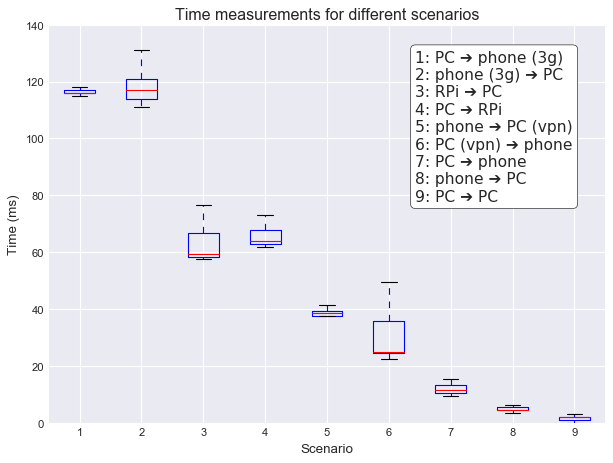

In [147]:
traces = []
for file in files:
    with open("measurements/" + file, "r") as f:
        lines = f.readlines()
        ajds = [float(line.split(" ")[1]) for line in lines]
        traces.append(ajds)

# sort traces by mean
traces_sorted = sorted(zip(traces, labels), key=lambda x: -np.mean(x[0]))
adjs_sorted = [x[0] for x in traces_sorted]
labels_sorted = [x[1] for x in traces_sorted]

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots()
ax.boxplot(adjs_sorted, labels=range(1, len(adjs_sorted)+1), showfliers=False)
ax.set_xlabel("Scenario")
ax.set_ylabel("Time (ms)")
ax.set_title("Time measurements for different scenarios")
num_labels = [f"{i+1}: {v}" for i,v in enumerate(labels_sorted)]

ax.annotate("\n".join(num_labels), xy=(330, 200), xycoords='axes points',
            size=14, bbox=dict(boxstyle='round', fc='w'), fontfamily='DejaVu Sans')

plt.savefig("boxplot.png", dpi=300)
plt.show()